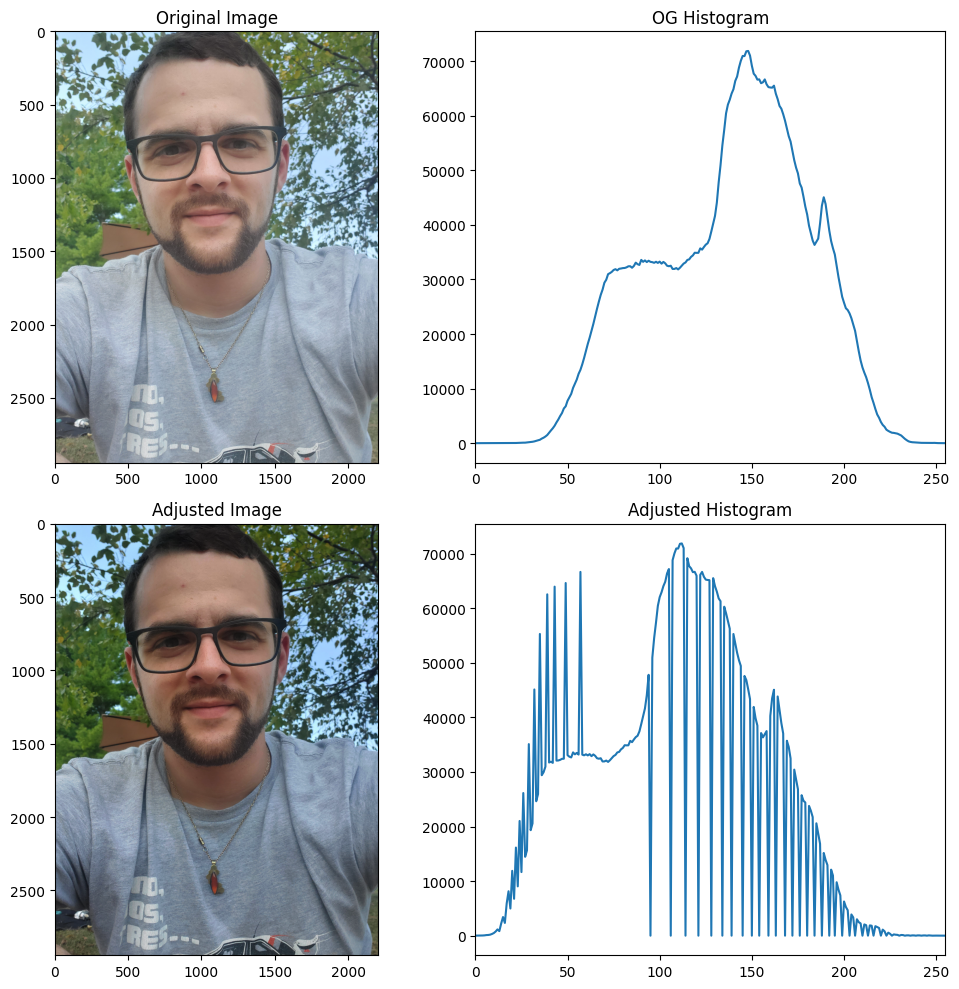

In [10]:
#Import Libraries
import cv2
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

#Define gamma correction function
def gamma_correction(img, gamma):
    # Normalize the image to [0, 1], apply gamma correction, and then scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    # Return the corrected image
    return np.uint8(corrected)

#Import the image and convert to rgb
img = cv2.imread('Graphics/Alex_Face.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Create a Histogram of original image
hist1 = cv2.calcHist([img],[0],None,[256],[0,255])

#Apply gamma correction
gamma = 1.5
corrected_img = gamma_correction(img, gamma)

#Create a Histogram of the gamma corrected image
hist2 = cv2.calcHist([corrected_img],[0],None,[256],[0,255])

#Plot original and adjusted images side-by-side
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(hist1)
plt.xlim([0,255])
plt.title('OG Histogram')

plt.subplot(2, 2, 3)
plt.imshow(corrected_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')

plt.subplot(2, 2, 4)
plt.plot(hist2)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

plt.tight_layout()
plt.show()


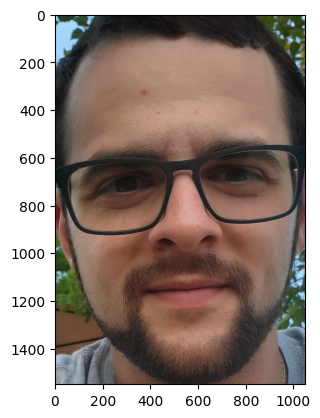

In [42]:
#Create a mask of my face
img_masked = corrected_img[100:1650, 500:1550]
plt.imshow(img_masked)

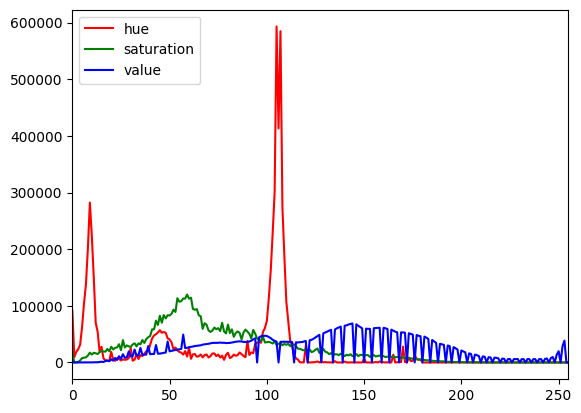

In [43]:
#Convert masked image to HSV
img_masked = cv2.cvtColor(corrected_img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()





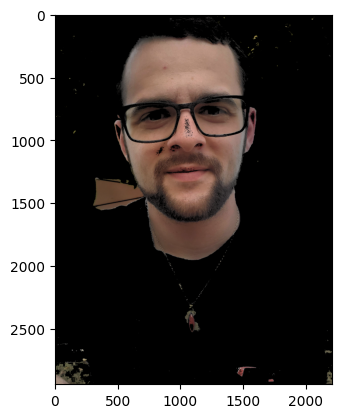

In [66]:

#Convert the original gamma corrected image to HSV
img_hsv = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2HSV)

#define lower and upper bounds based on histogram
lower_bound = np.array([90, 0, 40], np.uint8)
upper_bound = np.array([150,150, 220], np.uint8)
#masking the image using inRange() function
mask = cv2.inRange(img_hsv, lower_bound, upper_bound)# Let's add our mask to our image.
#Uncomment to show mask  
#plt.imshow(mask, cmap="gray")

#Apply the mask by comparing pixels from mask to image
img_masked = cv2.bitwise_and(corrected_img, corrected_img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)